# Ví dụ 1.

## Numpy

In [115]:
# Gọi các thư viện cần thiết
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [116]:
# Kỳ vọng và hiệp phương sai của 3 cụm dữ liệu
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

In [117]:
# Số điểm mỗi cụm dữ liệu
N = 500

In [118]:
# Tạo các cụm dữ liệu qua phân bố chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

In [119]:
X0.shape

(500, 2)

In [120]:
# Tổng hợp dữ liệu từ các cụm
X = np.concatenate((X0, X1, X2), axis = 0)

In [121]:
X.shape

(1500, 2)

In [122]:
# Số cụm = 3
K = 3

In [123]:
# Gán nhãn ban đầu cho các cụm, sau đó ta test model và so sánh
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [124]:
original_label.shape

(1500,)

In [125]:
# hiển thị tập dữ liệu X lên mặt phẳng
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [126]:
# Khởi tạo điểm trung tâm cụm ban đầu
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]    

In [127]:
# gán nhán mới cho các điểm khi biết các centers.
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [128]:
# Cập nhật điểm centers mới dựa trên dữ liệu mới đc gán nhãn
# Tâm cụm mới sẽ là trung bình cộng (theo tọa độ) của tất cả các điểm có trong cụm)
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [129]:
# Kiểm tra điều kiện dừng
# Nếu tâm cụm không đổi nghĩa là thuật toán đã dừng (hội tụ) -? TRUE
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
    set([tuple(a) for a in new_centers]))

In [130]:
# vòng lặp thực hiện tất cả các bước trong thuật toán k-means cho đến khi thuật toán dừng
def kmeans_np(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        
        if has_converged(centers[-1], new_centers):
            break
        
        centers.append(new_centers)
        it += 1
        
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


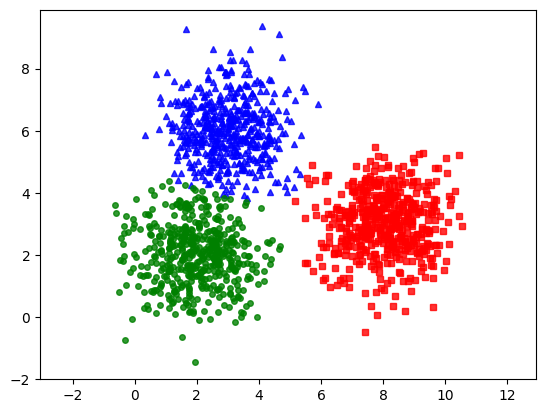

In [131]:
#
(centers, labels, it) = kmeans_np(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

## Thực hiện bằng thư viện sklearn.

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


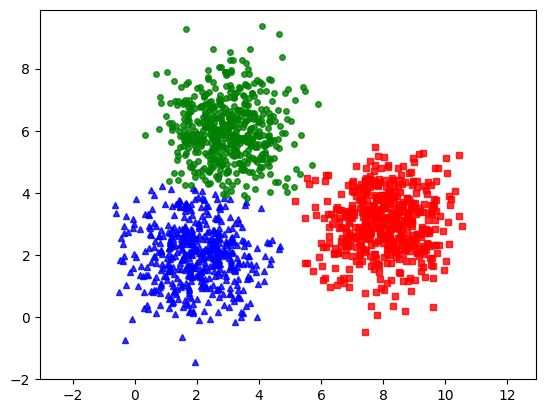

In [132]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

# Ví dụ 2

In [133]:
# import thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [134]:
# phương thức để hiển thị dữ liệu
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True
    
    # Rescale
    A = A - np.average(A)
    
    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)
    
    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))
    
    if not opt_graycolor:
        image *= 0.1
        
    k = 0
    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue
                
            clim = np.max(np.abs(A[:, k]))
            
            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz +
                buf):buf + j * (sz + buf) + sz] = \
                A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz +
                buf):buf + j * (sz + buf) + sz] = \
                A[:, k].reshape(sz, sz) / np.max(np.abs(A))
                
            k += 1
        
    return image

In [135]:
def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A the basis, with patches as column vectors
    # In case the midpoint is not set at 0, we shift it dynamically
    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)
        
    cols = np.round(np.sqrt(A.shape[1]))
    
    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    
    rows = np.ceil(A.shape[1] / cols)
    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]
    
    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))
    
    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))
    
    for i in range(int(rows)):
        for j in range(int(cols)):
        # This sets the patch
        
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols
            + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols
            + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols
            + j].reshape(dim, dim)
            
        image = (image + 1) / 2
    return image

In [136]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# mndata = MNIST('')
# mndata.load_testing()

In [137]:
X = test_X.reshape(test_X.shape[0], -1)
print(X.shape)

(10000, 784)


In [138]:
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


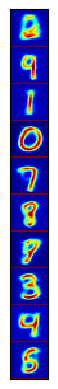

In [139]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')

In [140]:
# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4)
image = cmap(norm(A))

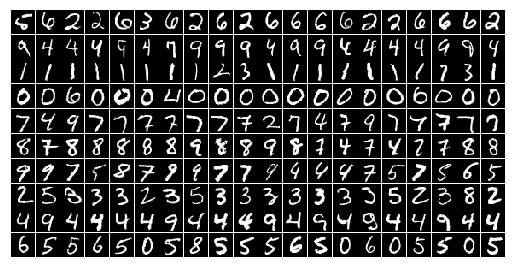

In [141]:
N0 = 20
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]
    
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]
    
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

# Homework 1

Hãy áp dụng đoạn chương trình chúng ta tự xây dựng trong ví dụ 1, với dữ liệu là hình ảnh chữ số viết
tay như trong ví dụ 2, chạy để xem xét kết quả.

In [142]:
X.shape

(1000, 784)

In [143]:
K

10

In [144]:
# sử dụng code trong ví dụ 1 để thực hiện phân cụm k-means
(centers, labels, it) = kmeans_np(X, K)
print('Centers found by our algorithm')
print(centers[-1])

Centers found by our algorithm
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [145]:
centers = np.array(centers[-1])

centers.shape

(10, 784)

In [146]:
centers=centers.T

centers.shape

(784, 10)

In [147]:
labels=np.array(labels[-1])
labels.shape

(1000,)

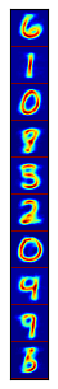

In [148]:
A = display_network(centers, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

In [149]:
# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4)
image = cmap(norm(A))

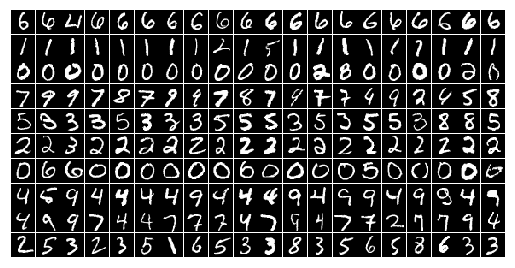

In [150]:
N0 = 20
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[labels == k, :]
    
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]
    
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()